# The Most Pet Friendly Neighborhood
The metric is the number of dogs in the neighborhood, which is based off the number of dog licenses in the neighborhood.

In [689]:
import pandas as pd
import geopandas as gpd

In [691]:
# import the dog license data
data = pd.read_csv("dogs_valid.csv")

# drop duplicates
data.drop_duplicates()

# display first 5 data points
data.head(5)

,_id,LicenseType,Breed,Color,DogName,OwnerZip,ExpYear,ValidDate
0,23445643,Dog Lifetime Spayed Female,LABRADOR RETRIEVER,YELLOW,SASHA,15137,2099,2005-01-31T00:00:00
1,23445644,Dog Lifetime Neutered Male,LABRADOR RETRIEVER,BROWN,JAKE,15129,2099,2004-06-21T00:00:00
2,23445645,Dog Lifetime Spayed Female,MIXED,SPOTTED,SHILOH,15129,2099,2006-01-20T00:00:00
3,23445646,Dog Lifetime Spayed Female,LAB MIX,BROWN,BLONDIE,15140,2099,2005-07-18T00:00:00
4,23445647,Dog Lifetime Spayed Female,AUS SHEPHERD,MULTI,SASHA,15238,2099,2004-02-25T00:00:00


In [693]:
# sort data by zip code of dog licenses, and presumably 
# dogs
data.groupby("OwnerZip").count()

,_id,LicenseType,Breed,Color,DogName,ExpYear,ValidDate
OwnerZip,,,,,,,
15003,34,34,34,34,34,34,34
15005,55,55,55,55,55,55,55
15006,10,10,10,10,10,10,10
15007,10,10,10,10,10,10,10
15012,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...
16342,1,1,1,1,1,1,1
32081,1,1,1,1,1,1,1
33426,1,1,1,1,1,1,1


In [695]:
# some areas don't seem to have a lot of dogs, so we will filter those out
def func(x):
    return len(x) > 4

pop_zip = data.groupby("OwnerZip").filter(func)

# display count by zip code again
zipCodes = pop_zip.groupby("OwnerZip").count()
zipCodes

,_id,LicenseType,Breed,Color,DogName,ExpYear,ValidDate
OwnerZip,,,,,,,
15003,34,34,34,34,34,34,34
15005,55,55,55,55,55,55,55
15006,10,10,10,10,10,10,10
15007,10,10,10,10,10,10,10
15014,171,171,171,171,171,171,171
...,...,...,...,...,...,...,...
15332,152,152,152,152,152,152,152
15642,8,8,8,8,8,8,8
16046,135,135,135,135,135,135,135


In [697]:
# sort high to low
sorted = zipCodes.sort_values("_id", ascending = False)
#sorted.head(10)

In [699]:
# take the top 10 zip codes
top = sorted.head(15)
top

,_id,LicenseType,Breed,Color,DogName,ExpYear,ValidDate
OwnerZip,,,,,,,
15237,2639,2639,2639,2638,2639,2639,2639
15236,1864,1864,1864,1860,1864,1864,1864
15108,1617,1617,1617,1614,1617,1617,1617
15044,1579,1579,1579,1577,1579,1579,1579
15102,1566,1566,1566,1564,1566,1566,1566
15235,1519,1519,1518,1518,1519,1519,1519
15239,1442,1442,1442,1440,1442,1442,1442
15101,1406,1406,1406,1406,1406,1406,1406
15122,1403,1403,1403,1403,1403,1403,1403


<Axes: xlabel='OwnerZip'>

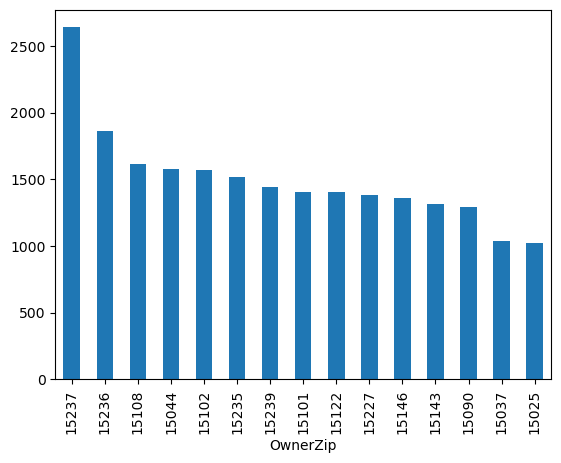

In [704]:
top = top[top.columns[1]]
top.plot.bar()

# Conclusion
From this, we see that the neighborhoods with the greatest number of dogs (from converting zip codes to neighborhoods) are McCandless, South Park, Coraopolis, Sewickley, Bridgeville, Penn Hills, Murraysville, Aliquippa, McKeesport, Baldwin, West Mifflin, White Oak, West Newton, McKeesport, Charleroi

In [670]:
#custom_index = pd.Series(['15237', '15236', '15108', '15044', '15102', '15235', '15239', '15101', '15122', '15227'])
#neighborhoods = pd.Series(['McCandless', 'South Park', 'Coraopolis', 'Sewickley', 'Bridgeville', 'Penn Hills', 'Murrysville', 'Aliquippa', 'McKeesport', 'Baldwin'])
#neighborhood_series = pd.Series(neighborhoods, index = custom_index)
#neighborhood_series
#type(neighborhood_series)
#type(top)
#together = pd.concat([top, neighborhood_series], axis=1)
#together

In [678]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
#neighborhoods.head(20)
#neighborhoods.plot()

In [ ]:
#neighborhoods.merge(area, how='left', left_on='', right_on='neighborhood') 